# Explotation of proteomics data

The aim of this exercise is to visually divide samples by exposure. The main task here is to  find discriminating features. This is what machine learning is about. 

In [1]:
# First we load some libraries that we always need
# If you do not know what they are good for I suggest 
# three options:
# 1. Do not worry about this for now
# 2. Use google to find information
# 3. Ask somebody who might know
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
digits = datasets.load_digits(n_class=10)
#X = digits.data
#y = digits.target

In [4]:
df = pd.DataFrame(digits.data)
columns = df.columns

In [5]:
df['target'] = digits.target

In [6]:
fit_values = np.vstack((df.groupby('target').mean().values,
                       df.groupby('target').min().values,
                       df.groupby('target').max().values))

In [7]:
# Import PCA module
from sklearn.decomposition import PCA
# Fit and transform PCA
pca = PCA(n_components=min(fit_values.shape)).fit(fit_values)
print('explained_variance_ratio', np.cumsum(pca.explained_variance_ratio_))
X = pca.transform(df[columns].values)

explained_variance_ratio [0.78722984 0.83294859 0.86737125 0.89761375 0.92014319 0.93149833
 0.94204939 0.95210529 0.96045137 0.96772793 0.9729248  0.97784942
 0.98210911 0.98557471 0.9883641  0.99086693 0.99284684 0.99453733
 0.99616524 0.99738409 0.99832068 0.9990736  0.99943215 0.99966383
 0.99978506 0.99987427 0.99994981 0.99997607 1.         1.        ]


### Visualization

For visualization we produce abbreviations of the dose names. We use a  helper function for this.

In [8]:
from itertools import cycle, islice
def plot_embedding(X, y_text, y_color=None, title=None, colors=None):
    if y_color is None:
        y_color = y_text
    if colors is None:
        palette = np.vstack((plt.cm.tab10(np.arange(10)), plt.cm.Set3(np.arange(12))))
        palette = np.array(list(islice(cycle(palette), len(np.unique(y_color)))))
        colors = {}
        for idx, value in enumerate(np.unique(y_color)):
            colors[value] = palette[idx]
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    dimensions = x_max - x_min
    x_max = x_max + 0.1*dimensions
    x_min = x_min - 0.05*dimensions

    #plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y_text[i]),
                 color=colors[y_color[i]],
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xlim([x_min[0], x_max[0]])
    plt.ylim([x_min[1], x_max[1]])
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

We make a list of dosage abbreviations

### Plot the data

First we plot the first two principal components

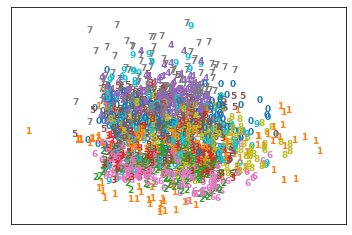

In [9]:
plot_embedding(X[:, [0, 1]], 
               df['target'], 
               y_color=df['target'], colors=None)

Next we compute a fancy embedding of the all principal components.

In [10]:
# Import UMAP module
from umap import UMAP
# Suppress annoying warnings
import warnings
warnings.filterwarnings('ignore')
Y = UMAP(n_components=2).fit_transform(X)

And plot it

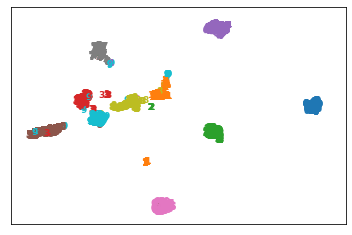

In [11]:
plot_embedding(Y, 
               df['target'], 
               y_color=df['target'], colors=None)

In [12]:
fit_values.shape

(30, 64)